# neccesary library
    

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
sns.set(style='whitegrid')

In [131]:
df = pd.read_csv(r"D:\\digicrome_datascienceAndAI\\Projects\\Thrid_Project_Exploratory Data Analysis\\housing_data.csv")
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec 

In [160]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Property_Age     0
Length: 82, dtype: int64


In [161]:
df = df.drop_duplicates()

In [162]:
df = df.dropna()


# Univariate Analysis


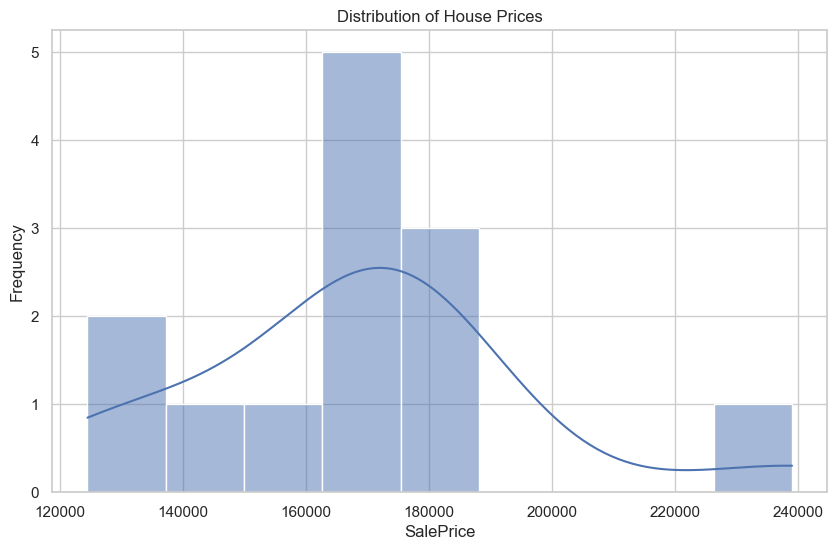

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis
    


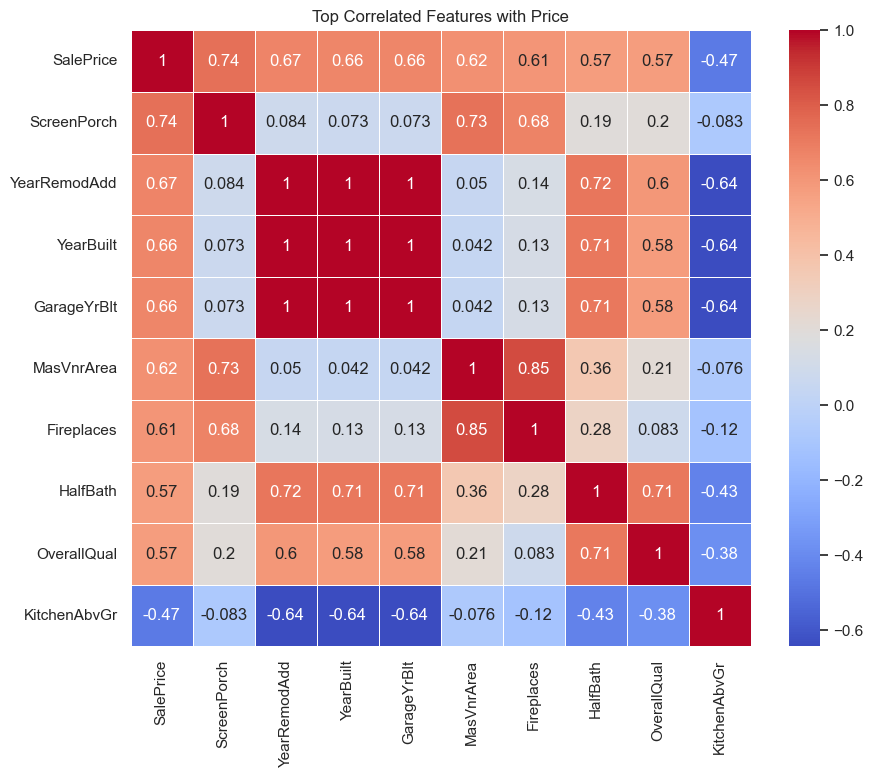

In [149]:
# Step 5: Multivariate Analysis - Focused on Numeric Features Only
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_df.corr()

# Get top 10 features most correlated with Price (or your target column name)
target = 'SalePrice'  # change if your column name is different
top_corr = corr_matrix[target].abs().sort_values(ascending=False).head(10)
top_features = top_corr.index

# Plot heatmap for only those top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top Correlated Features with Price')
plt.show()


In [152]:
# Step 6: Feature Engineering
# Create price per square foot and property age
if 'Area' in df.columns and 'saleprice' in df.columns:
    df['Price_per_sqft'] = df['saleprice'] / df['Area']

if 'YearBuilt' in df.columns:
    df['Property_Age'] = 2025 - df['YearBuilt']

In [154]:
print("\nColumn names in the dataset:")
print(df.columns.tolist())



Column names in the dataset:
['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

# Size Impact

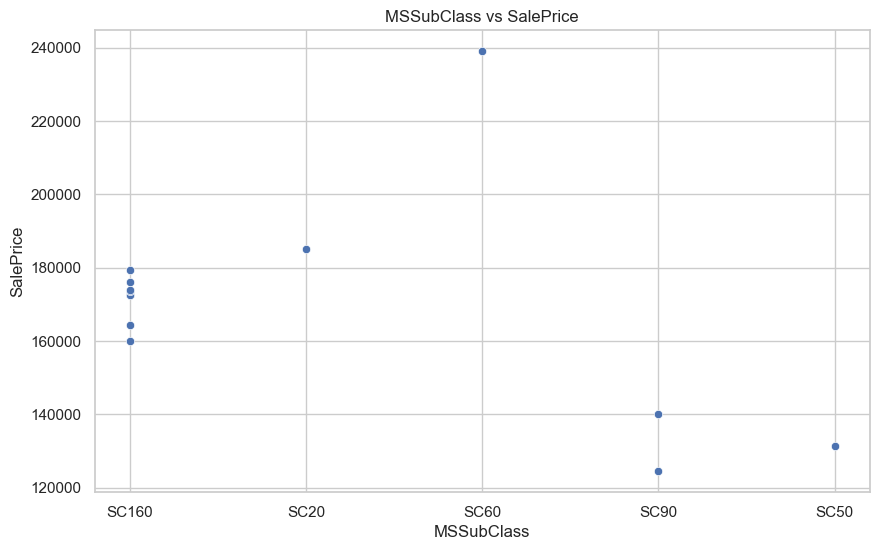

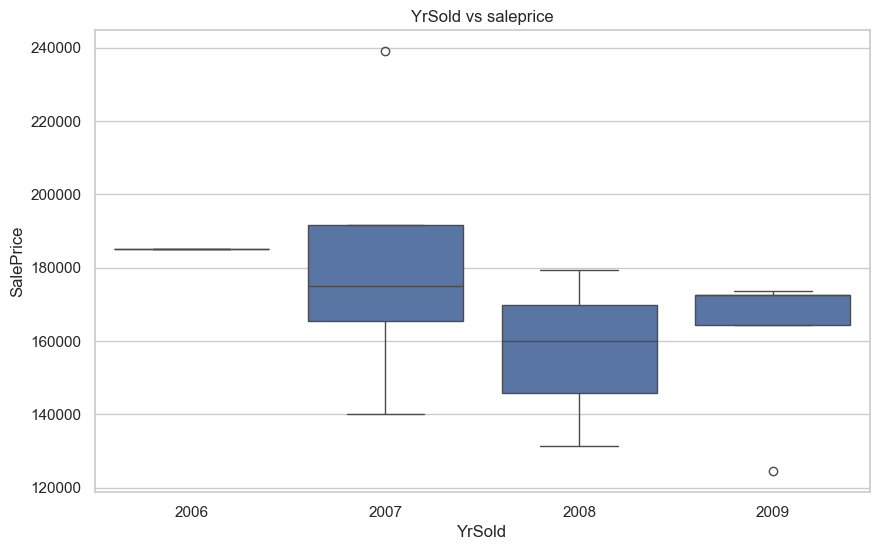

In [158]:
# Step 7: Size Impact
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MSSubClass', y='SalePrice', data=df)
plt.title('MSSubClass vs SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=df)
plt.title('YrSold vs saleprice')
plt.show()




C:\Users\Mi\AppData\Local\Temp\ipykernel_21396\1987782696.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['SalePrice'].resample('M').mean().plot(figsize=(12, 6))
C:\Users\Mi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


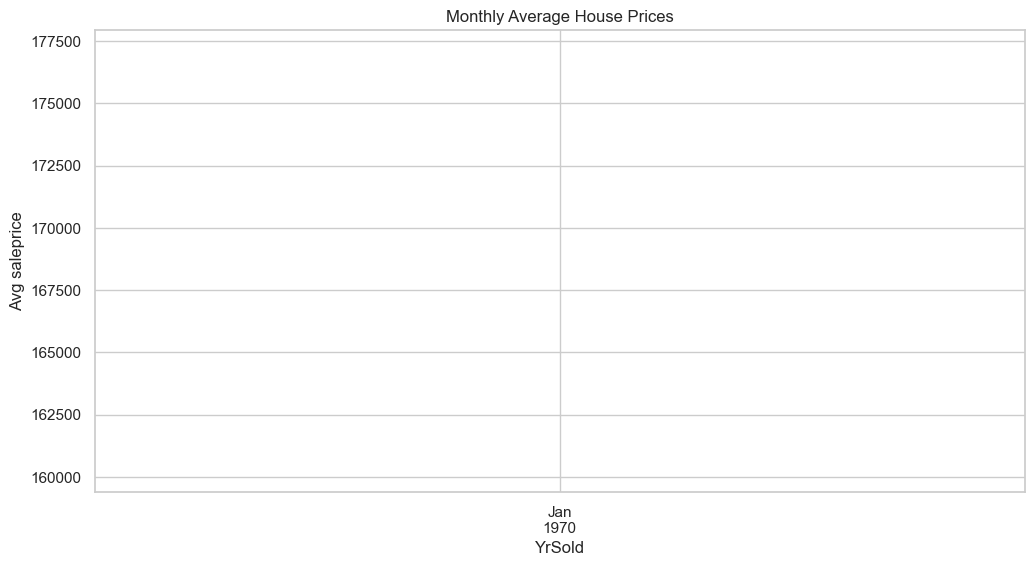

In [124]:
# Step 8: Market Trends (if Date column exists)
if 'YrSold' in df.columns:
    df['YrSold'] = pd.to_datetime(df['YrSold'])
    df.set_index('YrSold', inplace=True)
    df['SalePrice'].resample('M').mean().plot(figsize=(12, 6))
    plt.title('Monthly Average House Prices')
    plt.xlabel('YrSold')
    plt.ylabel('Avg saleprice')
    plt.show()


In [ ]:
# Step 9: Customer Preferences and Amenities (example with HasPool)
if 'HasPool' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HasPool', y='Price', data=df)
    plt.title('Price vs Pool Availability')
    plt.show()

In [171]:
# Step 10: Save the cleaned and processed DataFrame to a CSV file
df.to_csv(r"D:\\digicrome_datascienceAndAI\\Projects\\Thrid_Project_Exploratory Data Analysis\\Final_Housing_Data.csv", index=False)
